## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Objective**
# This project contains the real world data record of hotel bookings of a city and a resort hotel containing details like bookings, cancellations, guest details etc. from 2015 to 2017. Main aim of the project is to understand and visualize dataset from hotel and customer point of view i.e.

# reasons for booking cancellations across various parameters
# best time to book hotel
# peak season
# and give suggestions to reduce these cancellations and increase revenue of hotels.

# *Lets start!*

In [2]:
#importing some important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Dataset extraction
df=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

# Exploring Dataset

In [5]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **DATA SUMMARY**

***hotel:***The category of hotels,which are two resort hotel and city hotel.


 **is_canceled:**  The value of column show the cancellation type.If the booking was cancelled or not .values[0,1] where 1 indicates cancelled and 0 indicates not cancelled.


**lead_time:**The time between reservation and actual arriaval.


**arrival_date_year:**Year of arriavl of guest.


**arrival_date_month:** MOnth of arrival.


**arrival_date_week_number:**Date of arrival.


**stayed_in_weekend_nights:**The number of weekend nights stay per reservation


**stayed_in weekday_nights:**The number of weekday nights stay per reservation


**meal:**Meal preferences per reservation [BB,FB,HB,SC,Undefined]


**Country:**The origin country of guest.


**market_segment:** This column show how reservation was made and what is the purpose of resevation.E.g. corporate means corporate trip,TA for travel Agency.


**distribution_channel:**The medium through booking was made[Direct,Corporate,TA/TO,Undefined,GDS].


**Is_repeated_guest:**SHows if the guest is who has arrived earlier or not .values[0,1].0 means no and 1 means yes person is repeated guest.


**days_in_waiting_list**:Number of days between actual booking and transact.


**customer_type:**Type of customers [Transient,group,etc] 



In [7]:
df.shape

(119390, 32)

In [8]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


# Data Preparation and Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values and replace those by correct values or drop them.

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#creation of a Function for Null values Information 
def hotel_df():
  hotel_booking_df = pd.DataFrame(index=df.columns)
  hotel_booking_df['Datatypes'] =  df.dtypes
  hotel_booking_df['Count of non-null values'] = df.count()
  hotel_booking_df['NaN values'] = df.isnull().sum()
  hotel_booking_df['% NaN Values'] = (hotel_booking_df['NaN values']/len(df)).round(4)*100 
  hotel_booking_df['Unique_count'] = df.nunique()
  return hotel_booking_df
hotel_df()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
hotel,object,119390,0,0.00,2
is_canceled,int64,119390,0,0.00,2
lead_time,int64,119390,0,0.00,479
arrival_date_year,int64,119390,0,0.00,3
arrival_date_month,object,119390,0,0.00,12
arrival_date_week_number,int64,119390,0,0.00,53
arrival_date_day_of_month,int64,119390,0,0.00,31
stays_in_weekend_nights,int64,119390,0,0.00,17
stays_in_week_nights,int64,119390,0,0.00,35
adults,int64,119390,0,0.00,14


# So in our Dataset most of null values are in three columns country,agent and company and 4 nan value in children column

In [12]:
df.shape

(119390, 32)

firstly let  explore children column

In [13]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

so most of the values are 0 so we can replace null values by 0 in this column

In [14]:
df['children'].fillna(0,inplace=True)
#converting into int
df['children'] = df['children'].astype(int)

company has 94% nan values which is most of the data so we can't deal with the incomplete data ,so it's better to drop this out 

In [15]:
df.drop(['company'], axis = 1,inplace=True)

In [16]:
df.shape

(119390, 31)

**agent** column have 13% null values in it


In [17]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

next lets see country!we have 488 null values in it


In [18]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.

In [19]:
df = df.dropna(axis = 0)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Now the dataframe 'df' has no missing values.

In [21]:
#finding duplicates
df.duplicated().sum()

27823

In [22]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.50,0,0,Canceled,2015-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


so we don't have any duplicates in our data now.


our data cleaning is completed 


In [23]:
df.shape

(102896, 31)

# Removing columns which are not required for analysis and clubbing others.

In [24]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
#Lets combine children and babies together as kids
df['Kids'] = df.children + df.babies

#Combine total mumbers by adding kids and adults
df['total_members'] = df.Kids + df.adults

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids,total_members
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,0,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,0,2


#Data Preparation

In [27]:
#convert the datatypes to string
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')

df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [28]:
# Lets convert arrival date to datetime
df['Arrival Date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

In [29]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids,total_members,Arrival Date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2015-07-01
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,0,2,2015-07-01
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,0,2,2015-07-01


In [30]:
#storing all the confirmed bookings
confirmed_bookings = df[df.is_canceled=='0']
import datetime as dt
confirmed_bookings['ArrivingMonth'] = df['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1     2994
2     4037
3     5294
4     5608
5     6036
6     5700
7     7128
8     7660
9     5586
10    5550
11    3697
12    3443
Name: ArrivingMonth, dtype: int64

In [31]:
# Creating a copy so as not to disturb original dataset.
bookings_df = df.copy()

In [32]:
bookings_df.shape

(102896, 34)

In [33]:
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids,total_members,Arrival Date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2015-07-01
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,0,2,2015-07-01
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,0,2,2015-07-01


In [34]:
bookings_df.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids,total_members,Arrival Date
count,102896,102896,102896.000000,102896,102896,102896.000000,102896,102896.000000,102896.000000,102896.000000,...,102896.000000,102896,102896.000000,102896.000000,102896.000000,102896,102896,102896.000000,102896.000000,102896
unique,2,2,NaN,3,12,NaN,31,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,3,923,NaN,NaN,793
top,City Hotel,0,NaN,2016,August,NaN,17,NaN,NaN,NaN,...,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,NaN,NaN,2015-12-05 00:00:00
freq,71183,62733,NaN,49056,12674,NaN,3712,NaN,NaN,NaN,...,NaN,77756,NaN,NaN,NaN,62733,1426,NaN,NaN,410
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-31 00:00:00
mean,NaN,NaN,111.738007,NaN,NaN,27.339255,NaN,0.978182,2.589673,1.899928,...,2.619528,NaN,104.678736,0.053034,0.605466,NaN,NaN,0.118926,2.018854,NaN
std,NaN,NaN,107.681005,NaN,NaN,13.279881,NaN,1.003991,1.905939,0.490886,...,18.797261,NaN,50.022122,0.225357,0.799336,NaN,NaN,0.424843,0.654636,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,...,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,26.000000,NaN,NaN,17.000000,NaN,0.000000,1.000000,2.000000,...,0.000000,NaN,73.000000,0.000000,0.000000,NaN,NaN,0.000000,2.000000,NaN


# **Exploratory Analysis and Visualization**

# We will try to answer the following questions:

1.Which type of hotel have more Bookings?(Percentage of booking in each hotel).

2.From which country most of the customers are coming?

3.Which year has most bookings?

4.Which room type is in most demand and which room type  generates highest adr?

5.Which Hotel has higher booking cancellation rate?

6.which date of a month has least guest arrival?

7.How many Booking were cancelled?

8.What is the most preferred meal by customers?

9.which agent made most of bookings?

10.Which Hotel make more revennue?

11.Which hotel has more lead time?


12.Which hotel have higher and how much customer returning rate?

13.Which is most common channel for booking hotels?

14.which distribution channel brings better revenue generating deals for hotels?


15.What are the most busy months for hotels?

16.In which months hotels charges higher adr?

17.how many guests have any kind of special requests?

18.How adr(average daily rate) is affected by total staying period in hotels? 



# **Which type of hotel have more Bookings(Percentage of booking in each hotel)**

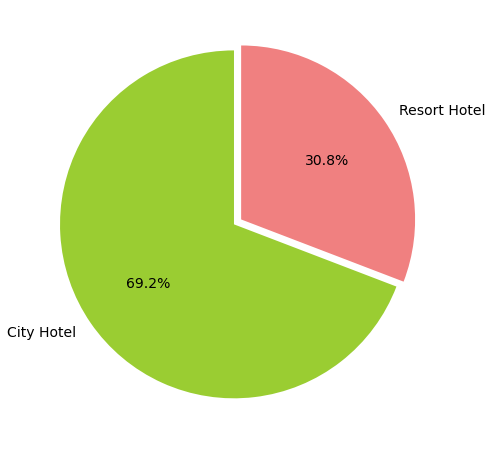

In [35]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.05)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

# We can see that the percent of City hotel is more compared to Resort hotel.
# Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.

# **From where the most guests are coming ?**

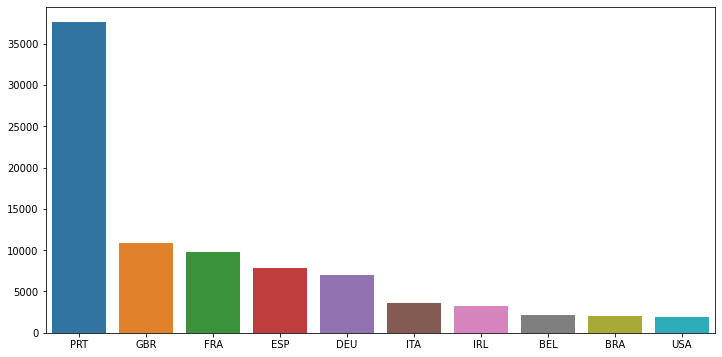

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))

# More visitors are from western europe, namely Portugal,France, Great Britain, and Spain being the highest.

#**Visualizing proportion of booking cancellations**

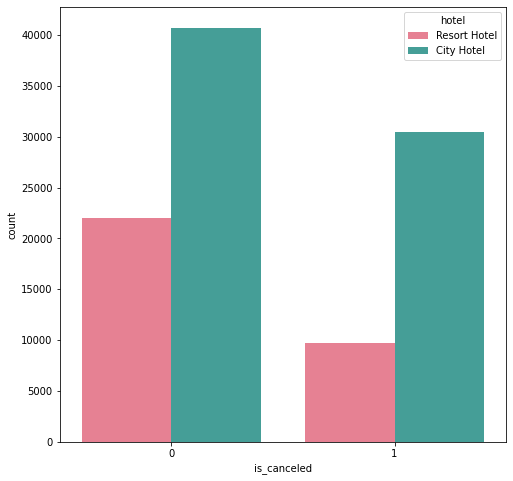

In [37]:
sns.countplot(data = bookings_df, x = 'is_canceled',hue='hotel',palette='husl')  # 0 => not canceled
plt.show()                                                        # 1=> canceled

# City hotels have the highest cancellation rates, this can be verified by the fact that city hotels have higher booking rate than resort hotels

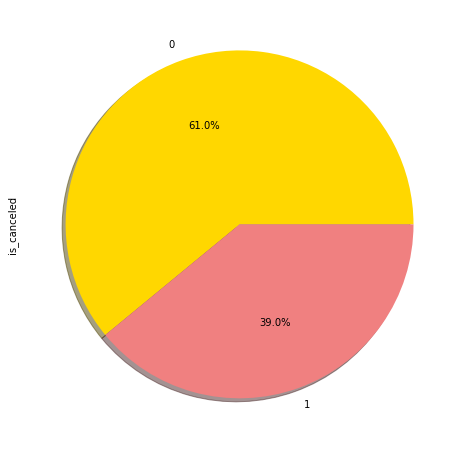

In [38]:
cols = ['gold', 'lightcoral']
bookings_df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

# According to the pie chart, 61% of bookings were not canceled and 39% of the bookings were canceled at the Hotel.

#**Guest arrival date** 

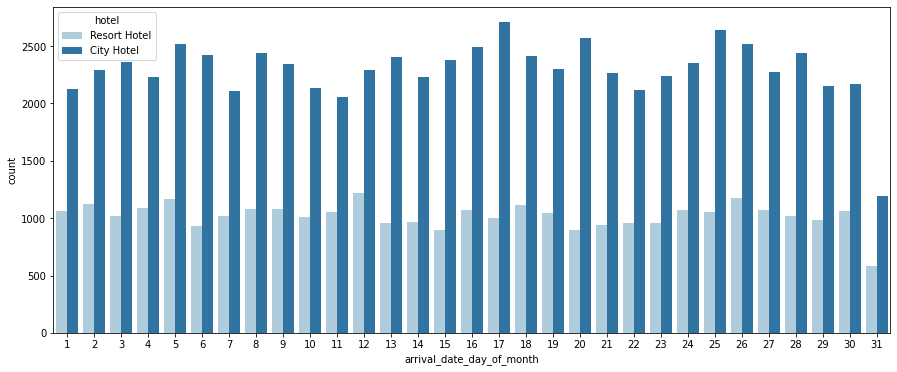

In [39]:
plt.figure(figsize=(15,6))

sns.countplot(data = bookings_df, x = 'arrival_date_day_of_month',hue='hotel',  palette='Paired')
plt.show()

# We can see that month ending has the least number of arrivals

#**Visualizing Hotel wise yearly bookings**

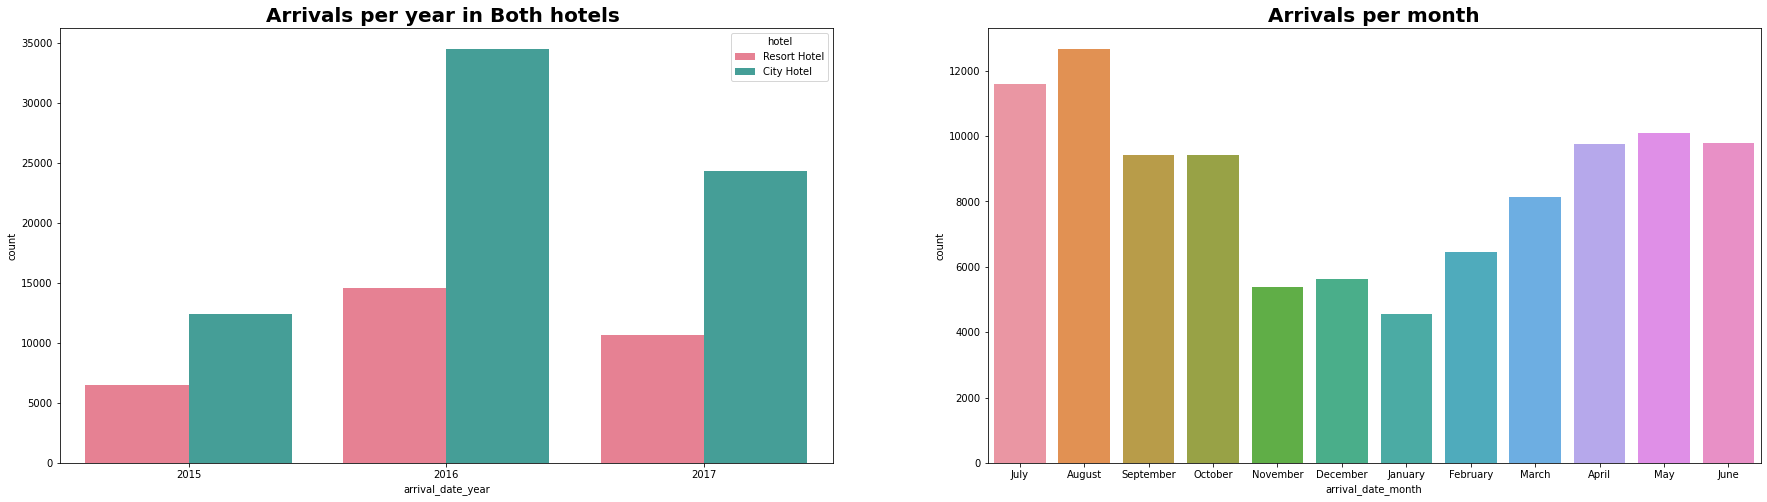

In [40]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=bookings_df,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'arrival_date_month')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

#  Bookings across years is higher for city hotel compared to resort hotel.

#We can see most of the bookings were in the year 2016 and bookings were doine in City hotel
# Most bookings were done in the month of May,June, July, August

#**Weekend**

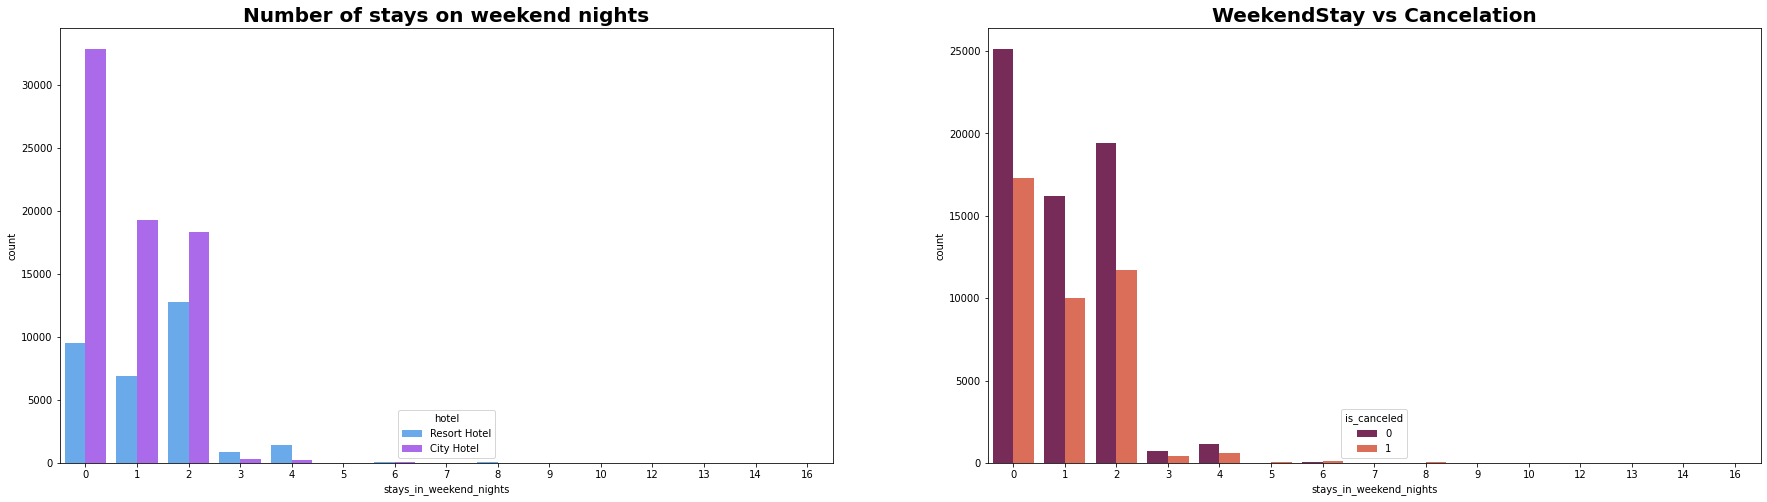

In [41]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=bookings_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

# In the first graph we can see that most of the weekend nights were booked in City Hotel
# Second plot shows most of weekend nights which were booked were not canceled

#**Weekday stay**

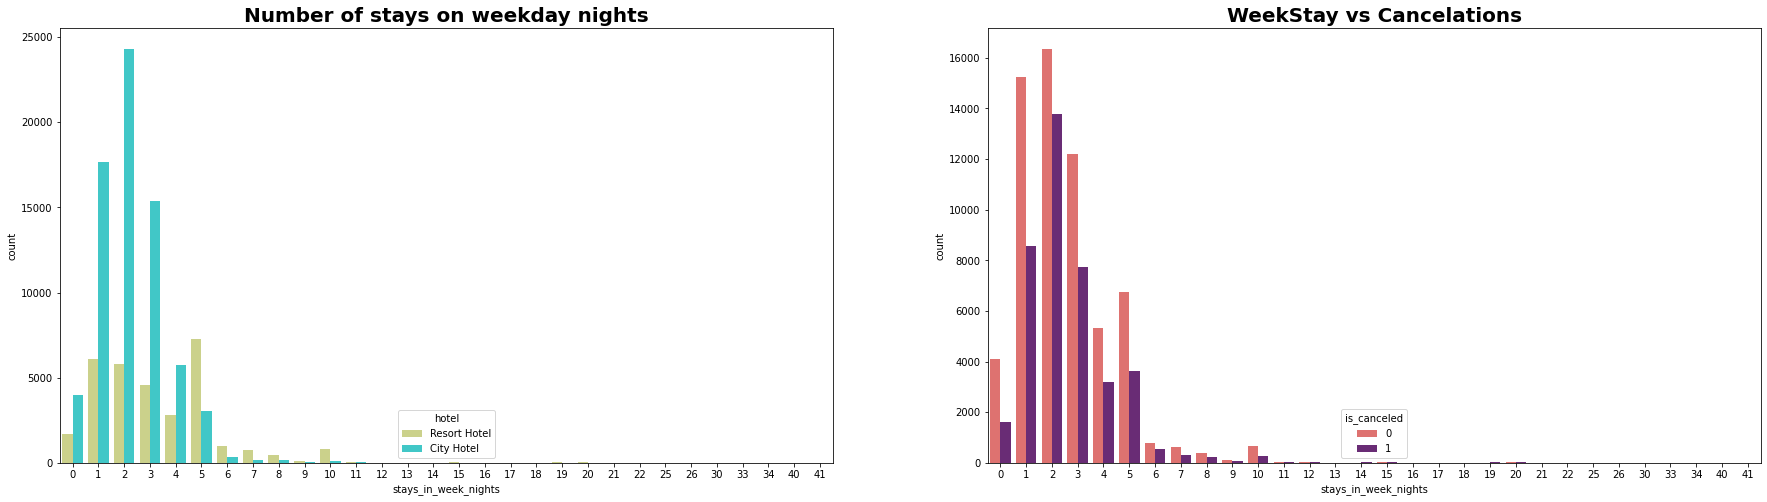

In [42]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=bookings_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

# Weekday night stays were more in City Hotel
# Less cancelations were observed

#**Visualizing monthly bookings and monthly cancellations**

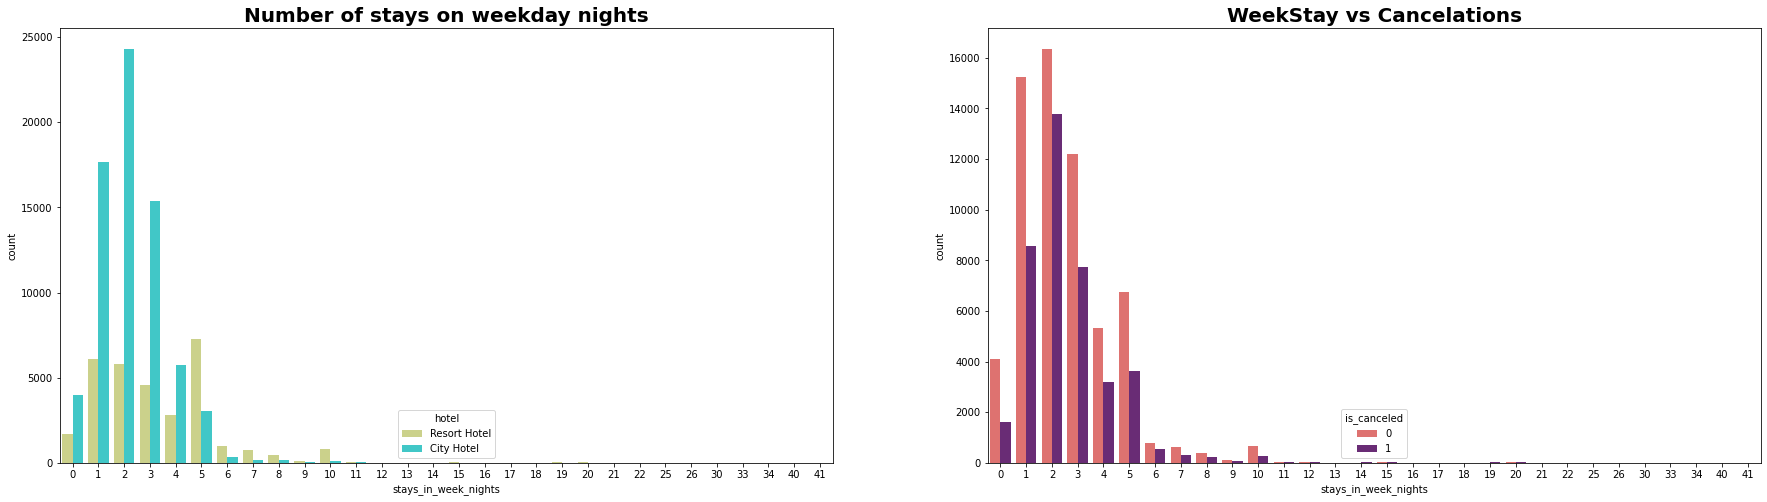

In [43]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=bookings_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

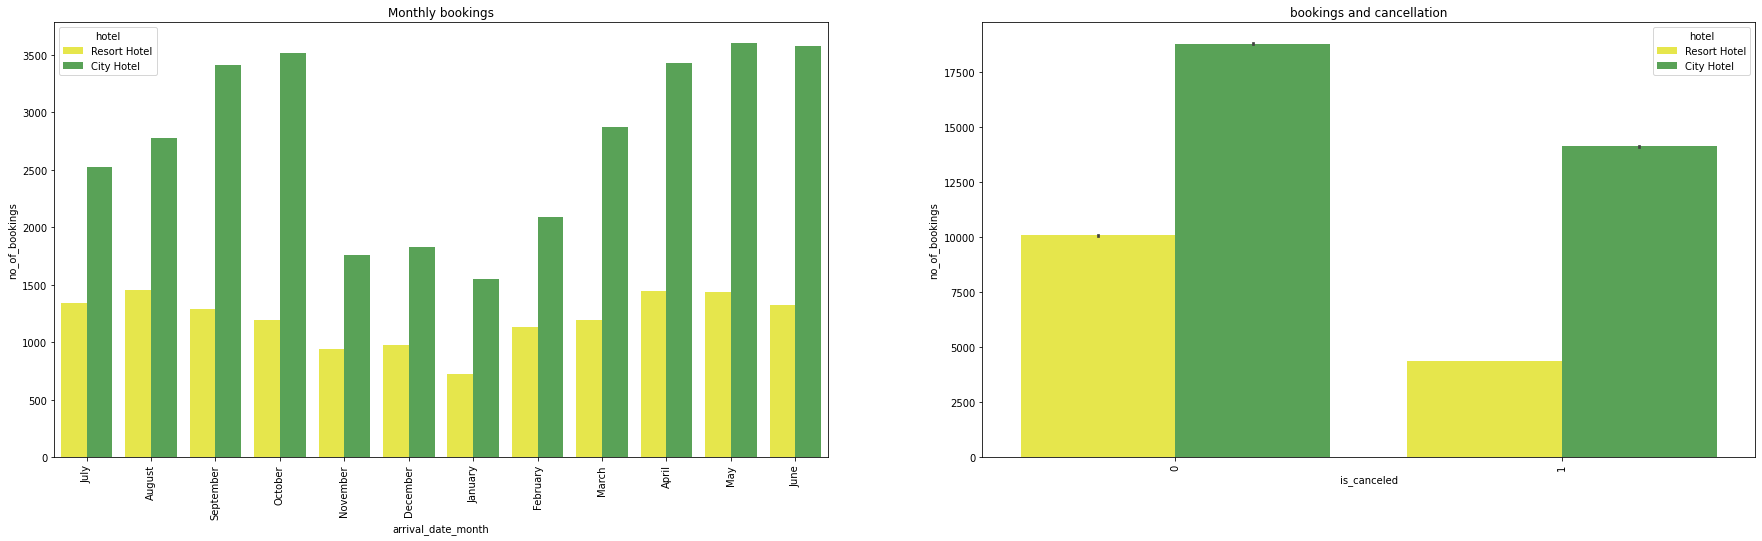

In [44]:
 #taking different values of months count into account.
df_copy= bookings_df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy,palette='Set1_r')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)  
plt.title("bookings and cancellation")
sns.barplot(x= 'is_canceled', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy,palette='Set1_r')
plt.xticks(rotation = 90)
plt.subplots_adjust(right=1.7)
plt.show()


#In case of city hotel, months with high bookings (May, June, September, October) also witnessed more cancellations. Guest numbers for the Resort hotel go down slightly from June to September though variations in bookings and cancellations are less in case of resort hotel. Both hotels have the fewest guests during the winter. 

#**Adults**

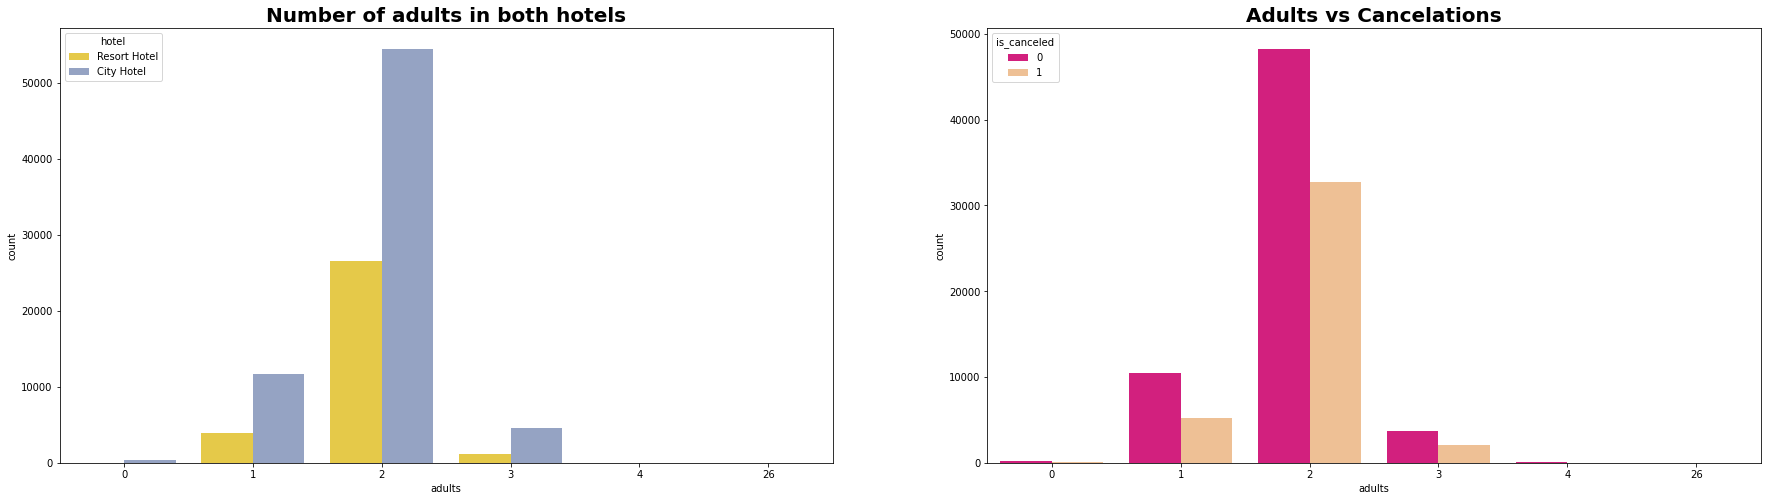

In [45]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='adults',hue='hotel', data=bookings_df, palette='Set2_r')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'adults', hue='is_canceled', palette='Accent_r')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

# Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

#**Children**

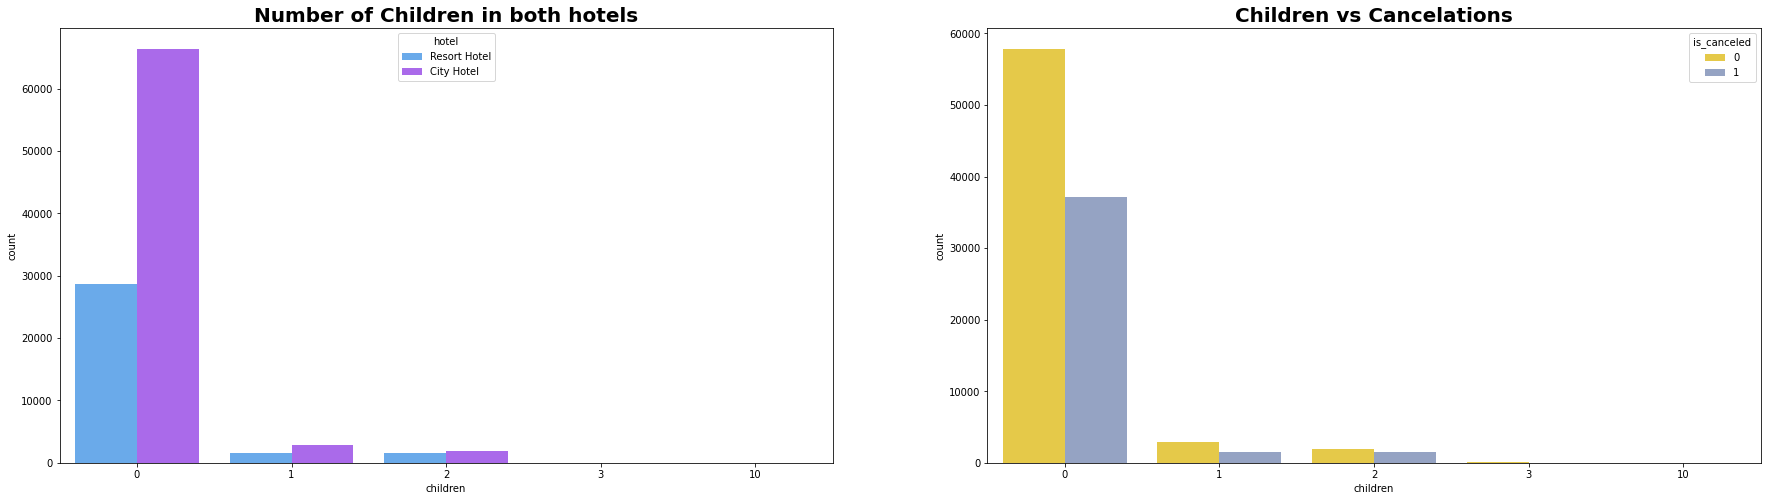

In [46]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='children',hue='hotel', data=bookings_df, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'children', hue='is_canceled', palette='Set2_r')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

#**Babies**

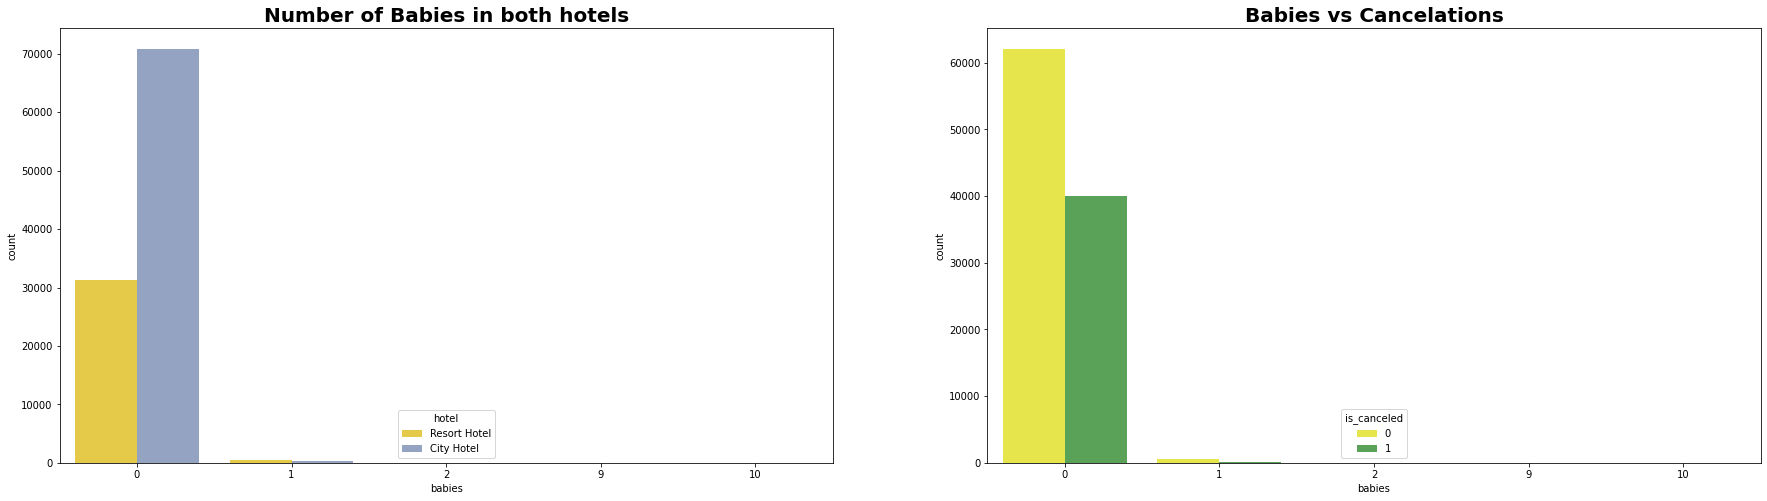

In [47]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='babies',hue='hotel', data=bookings_df, palette='Set2_r')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'babies', hue='is_canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

# Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel
# visitors who had 1 or 2 children also preferred city hotel

#**Market segment wise bookings**

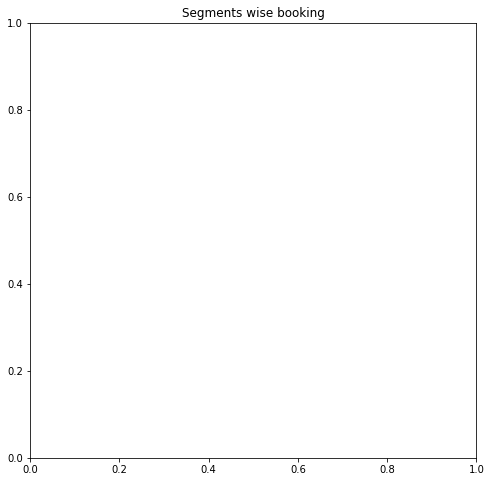

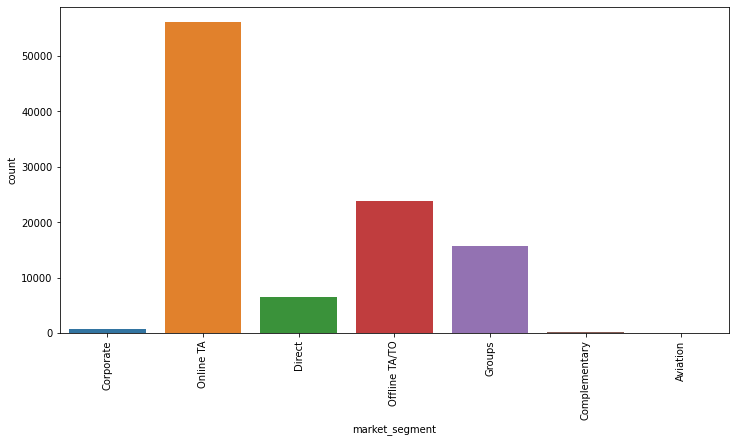

In [48]:
plt.title("Segments wise booking")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = "market_segment", data = bookings_df)
plt.xticks(rotation = 90)
plt.show()

# Indirect bookings through online and offline travel agents are higher compared to direct bookings and same is the case with group bookings which are also high.

#**Plotting monthly cancellations and customer type**

In [49]:
bookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids',
       'total_members', 'Arrival Date'],
      dtype='object')

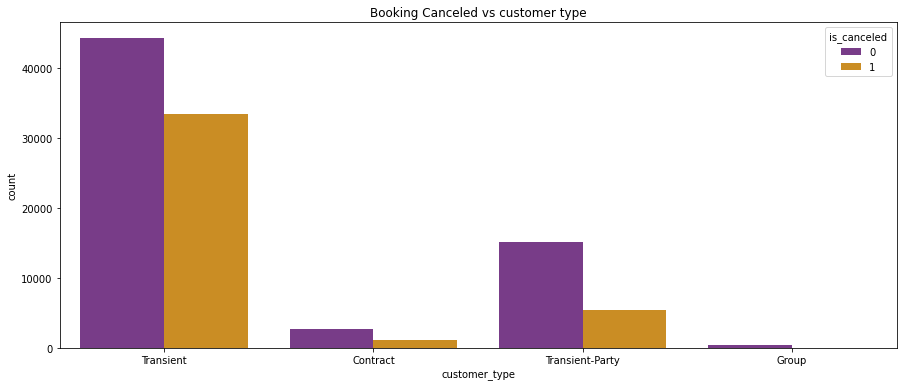

In [50]:
plt.figure(figsize=(15, 6))
plt.title("Booking Canceled vs customer type")
sns.countplot(x='customer_type',data=bookings_df ,hue='is_canceled',palette='CMRmap')

# Transient customer types have higher cancellations.

#**What is the relationship between deposit type and cancellation?**

In [52]:
bookings_df[bookings_df.deposit_type== 'Refundable'].deposit_type.count()

48

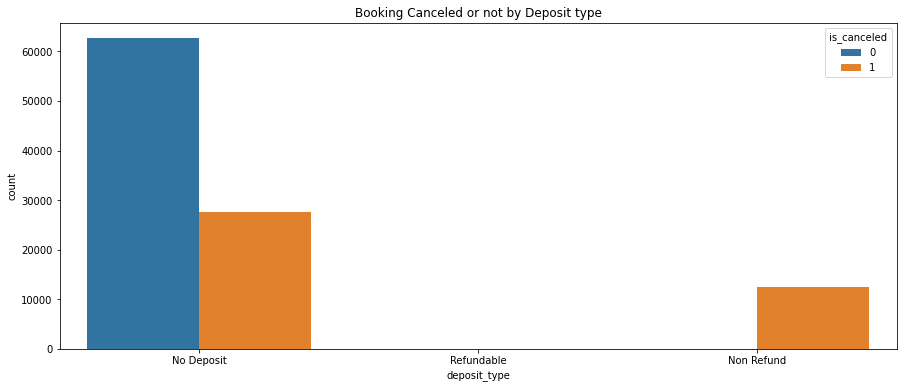

In [53]:
plt.figure(figsize=(15, 6))
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=bookings_df ,hue='is_canceled')

# Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

#**Types of deposite**

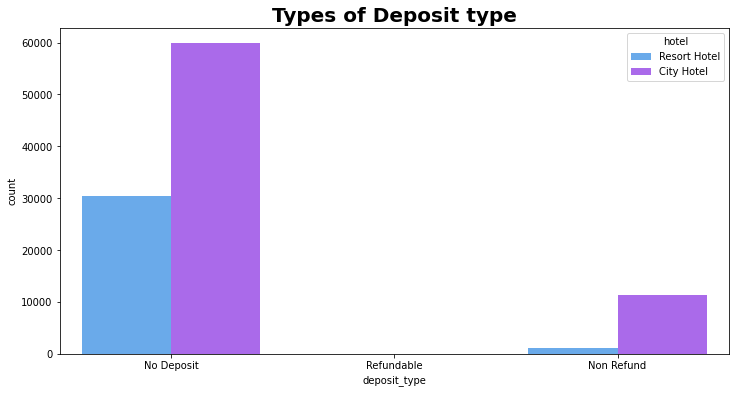

In [54]:
plt.figure(figsize=(12, 6))

sns.countplot(data = bookings_df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

# Majority of the bookings don't have a deposit towards it.

#**What is the relationship between market segment and cancellation?**

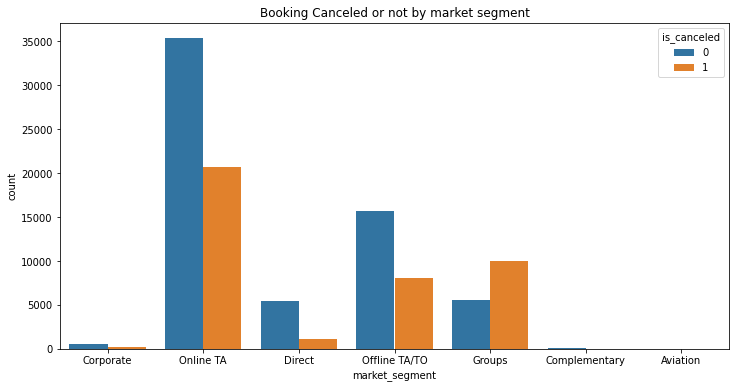

In [55]:
plt.figure(figsize=(12, 6))
plt.title("Booking Canceled or not by market segment")
sns.countplot(x='market_segment',data=bookings_df ,hue='is_canceled')

#  Groups segment has cancellation rate around 50%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate. It is interesting to note that direct segment has cancellation rate less than 20%.

#**What is the relationship between previous cancellations and cancellation?**

In [56]:
bookings_df[bookings_df.previous_cancellations==1].count()

hotel                             5384
is_canceled                       5384
lead_time                         5384
arrival_date_year                 5384
arrival_date_month                5384
arrival_date_week_number          5384
arrival_date_day_of_month         5384
stays_in_weekend_nights           5384
stays_in_week_nights              5384
adults                            5384
children                          5384
babies                            5384
meal                              5384
country                           5384
market_segment                    5384
distribution_channel              5384
is_repeated_guest                 5384
previous_cancellations            5384
previous_bookings_not_canceled    5384
reserved_room_type                5384
assigned_room_type                5384
booking_changes                   5384
deposit_type                      5384
agent                             5384
days_in_waiting_list              5384
customer_type            

In [57]:
bookings_df.previous_cancellations.unique()

array([ 0,  1,  2, 26, 25, 14,  3, 24, 21,  5, 13, 11,  6])

In [58]:
bookings_df.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids,total_members,Arrival Date
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,97341,97341,97341,97341,97341,97341,97341,97341,97341,97341,...,97341,97341,97341,97341,97341,97341,97341,97341,97341,97341
1,5384,5384,5384,5384,5384,5384,5384,5384,5384,5384,...,5384,5384,5384,5384,5384,5384,5384,5384,5384,5384
2,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
3,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
11,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
13,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
14,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


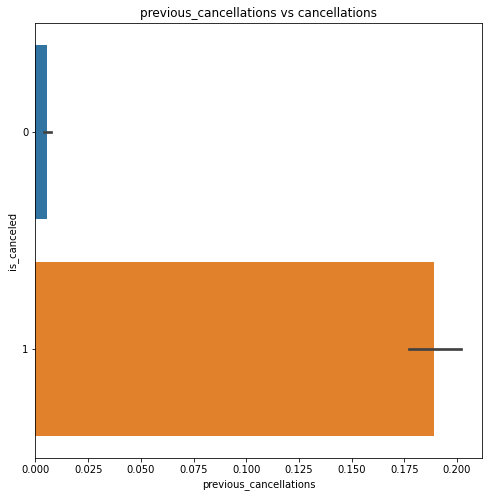

In [59]:
plt.title ('previous_cancellations vs cancellations')
sns.barplot(x= 'previous_cancellations' ,y = "is_canceled", data = bookings_df)

#  Those who have cancelled previously once have high chance of cancellation compared to 0 previous cancellations. For higher values of previous cancellations, numbers are very less and can be ignored.

#**How much does the price in hotels vary over the year?**

In [60]:
bookings_df['adr_pp']= bookings_df.adr/bookings_df.total_members
monthlyadr_df= bookings_df.groupby (['hotel','arrival_date_month'])['adr_pp'].mean()
monthlyadr_df=pd.DataFrame({"hotel":(map(lambda x:x[0],monthlyadr_df.index)), "month": list(map(lambda x:x[1],monthlyadr_df.index)), "mean": monthlyadr_df.values})
monthlyadr_df

,hotel,month,mean
0,City Hotel,April,NaN
1,City Hotel,August,NaN
2,City Hotel,December,NaN
3,City Hotel,February,NaN
4,City Hotel,January,NaN
5,City Hotel,July,NaN
6,City Hotel,June,NaN
7,City Hotel,March,NaN
8,City Hotel,May,NaN
9,City Hotel,November,NaN


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


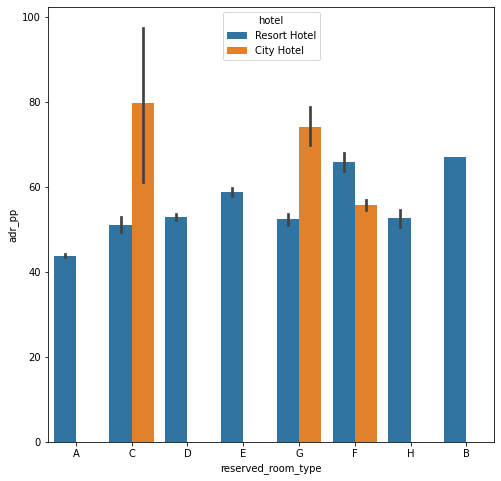

In [61]:
# plotting variation in adr with room type
sns.barplot(data = bookings_df, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


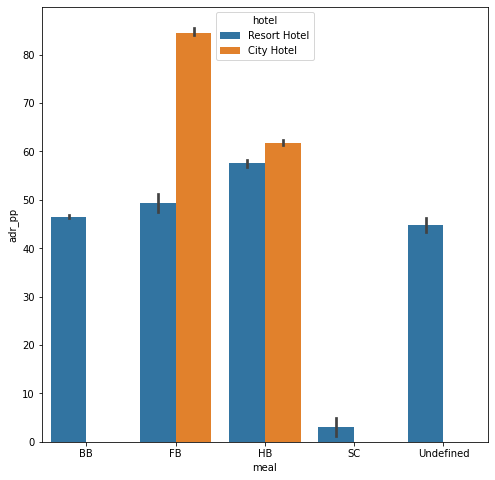

In [62]:
# plotting variation in adr with meal type
sns.barplot(data = bookings_df, x = 'meal', y = 'adr_pp', hue = 'hotel')

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


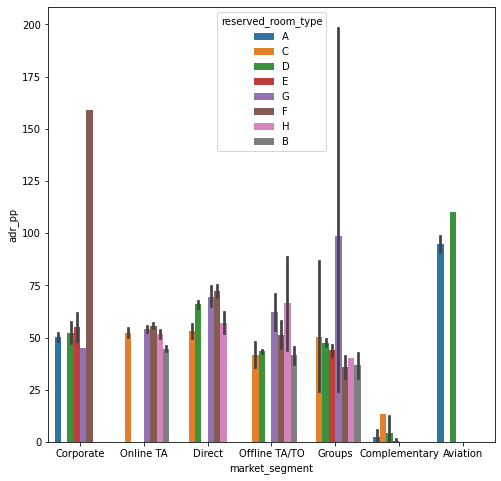

In [63]:
sns.barplot(x= 'market_segment', y= 'adr_pp', hue= 'reserved_room_type', data= bookings_df)

# This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn  and these vary with room type and meal type.

#**which market segment made highest bookings and which distribution channel have highest rate?**

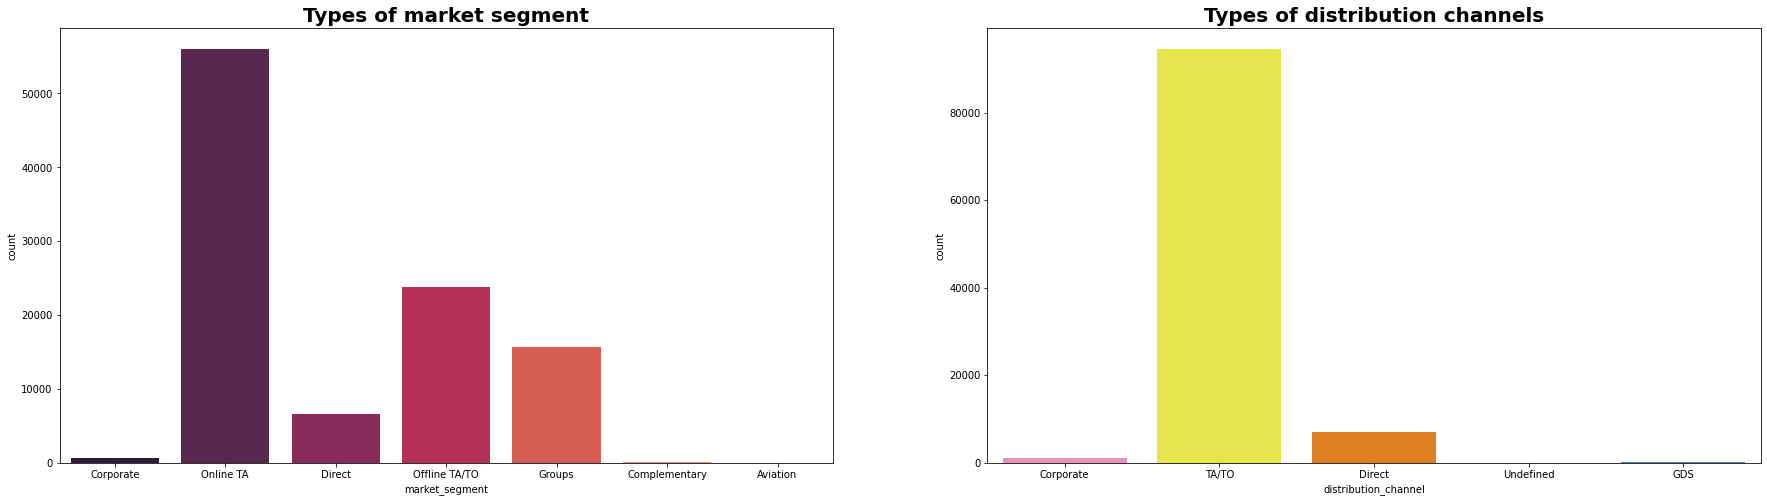

In [64]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=bookings_df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

# Majority of the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates

#  Which month is the most occupied and which is the least occupied?

In [65]:
#value_counts counts the number of times each values has appeared for example, July appeared in the arrival_date_month column 10.6% times.
bookings_df.arrival_date_month.value_counts(normalize=True) 

August       0.123173
July         0.112725
May          0.098031
June         0.095271
April        0.094717
October      0.091714
September    0.091461
March        0.079031
February     0.062636
December     0.054618
November     0.052441
January      0.044181
Name: arrival_date_month, dtype: float64

Text(0.5, 1.0, 'Types of market segment')

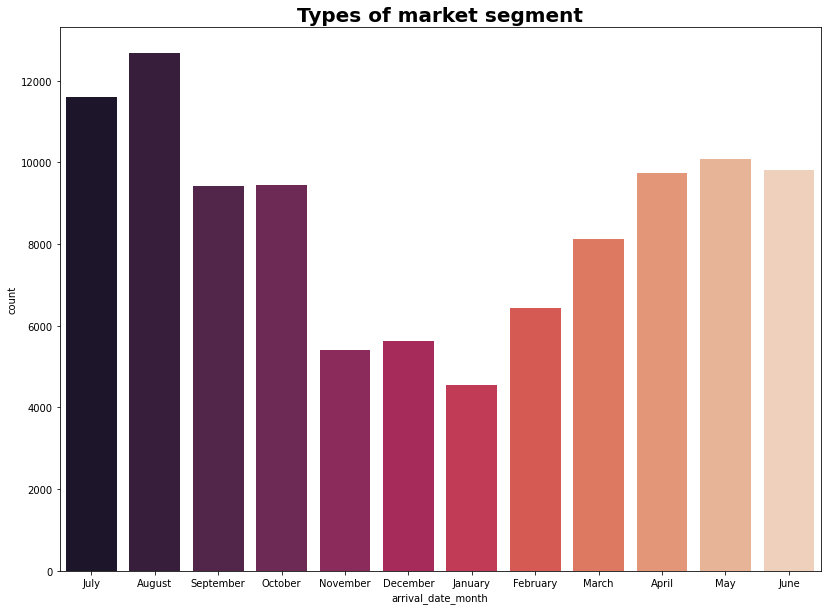

In [66]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_month', data=bookings_df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)


# August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

#**leadtime and cancelation**

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

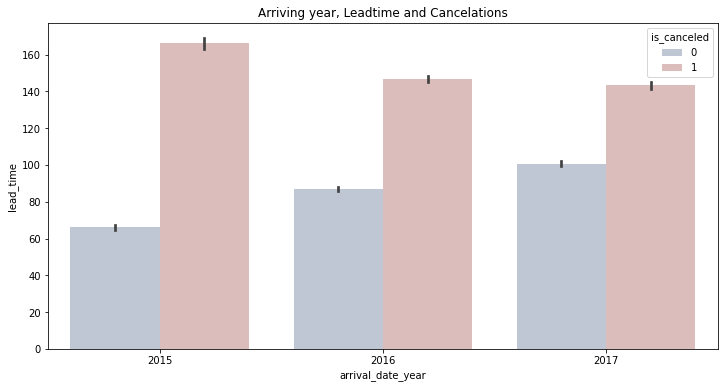

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= bookings_df, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

# For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

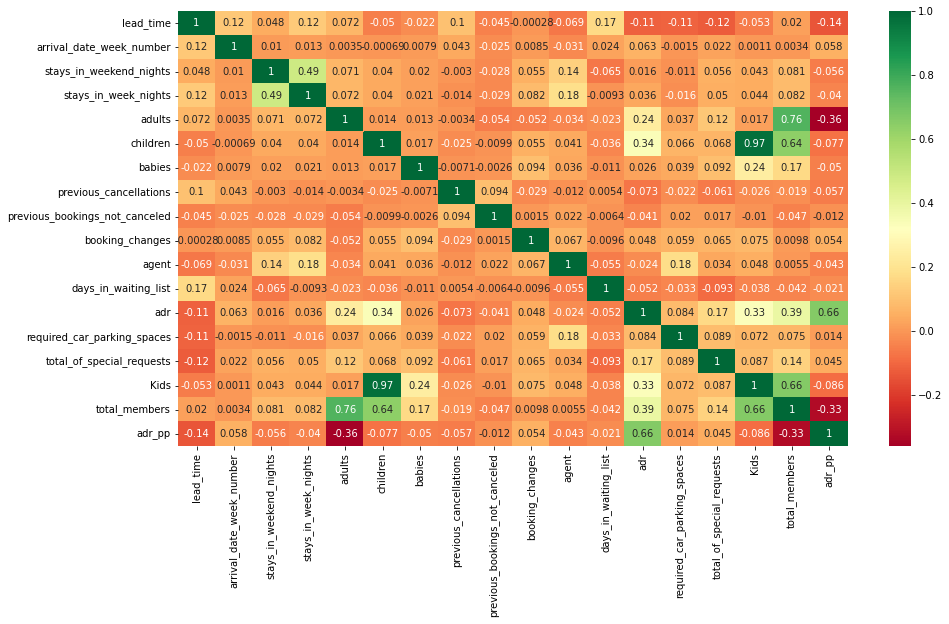

In [68]:
#Lets see the correlation
plt.figure(figsize=(15,8))
sns.heatmap(bookings_df.corr(),annot=True,cmap='RdYlGn')

#**Which months have cheaper booking rates?**

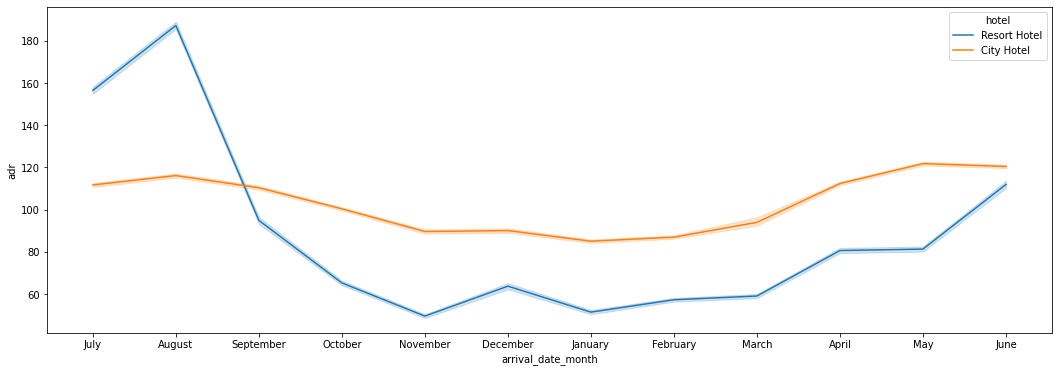

In [69]:
#this is a lineplot of the adr for different hotel types
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= bookings_df)
plt.show()

# For both city and resort hotels, Nov to Jan have cheaper average daily rates

#**Number of customers repeated their bookings.**

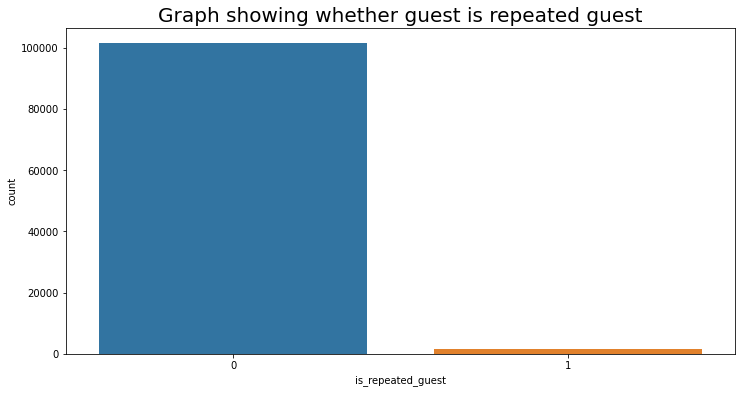

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(data = bookings_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

# Most customers are not repeating their booking.

#**what are the most preferred meal by guests?**

In [71]:
bookings_df['meal'].value_counts()

BB           77640
HB           13421
SC           10334
Undefined      830
FB             671
Name: meal, dtype: int64

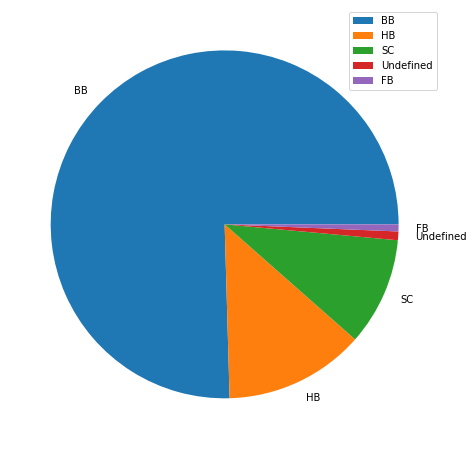

In [72]:
y = bookings_df['meal'].value_counts()
mylabels = ["BB", "HB", "SC", "Undefined","FB"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show()


# 2/3rd guests preferred BB(breakfast in bed) meal.

#**Does people with children have a particular preference for the type of hotel?**

Text(0.5, 1.0, 'Number of children')

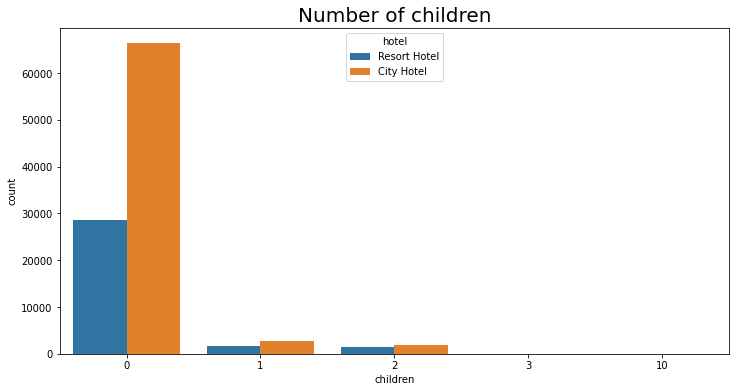

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(data = bookings_df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

# Families with children have no particular preference for the hotel type

# Looking into prices per month per hotel

# average daily rate =  SumOfAllLodgingTransaction / TotalNumberOfStayingNight 


# average daily rate per person =  ADR / (Adults+Children )


# We will need to find out average daily rate per person

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


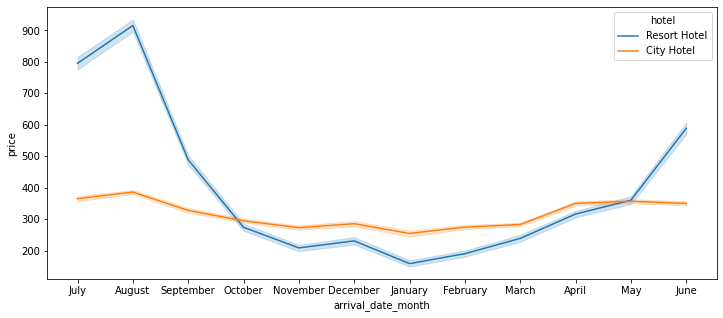

In [74]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = bookings_df['adr'] / (bookings_df['adults'] + bookings_df['children']) 
actual_guests = bookings_df.loc[bookings_df["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

# Prices of resort hotel are much higher in month of july,august.
# Prices of city hotel do not fluctuate that much

#**ADR: Average Daily Rate**

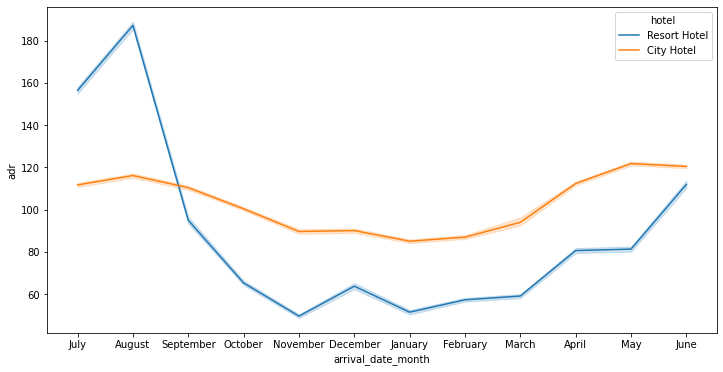

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= bookings_df)
plt.show()

# **Special requests**

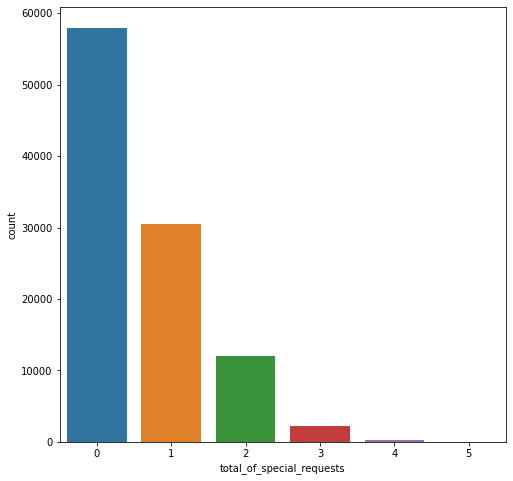

In [76]:
sns.countplot(data=bookings_df,x='total_of_special_requests')

# Most of the guest don't have any special request

# **Conclusions**



*   # Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
*   # We also realise that the high rate of cancellations can be due high no deposit policies.


*   # We should also target months between May to Aug. Those are peak months due to the summer period.
*   # Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.


*   # Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.
*   # Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.

*   # Encourage Direct bookings by offering special discounts
*  # Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.

*   # cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.










